# Pandas vs NumPy

## Pandas and NumPy Overview

NumPy provides efficient numerical computing through n-dimensional arrays (ndarrays), while Pandas builds on top of NumPy to offer high-level data structures like DataFrames for tabular data analysis. Both libraries are essential for data analysis but serve different purposes.

In [2]:
import numpy as np
import pandas as pd

# Create a simple NumPy array
np_array = np.array([1, 2, 3, 4, 5])
print("NumPy array:", np_array)

# Create a simple Pandas DataFrame
df = pd.DataFrame({'values': [1, 2, 3, 4, 5], 'squared': [1, 4, 9, 16, 25]})
print("\nPandas DataFrame:")
print(df)

NumPy array: [1 2 3 4 5]

Pandas DataFrame:
   values  squared
0       1        1
1       2        4
2       3        9
3       4       16
4       5       25


## Reading and Loading Data

NumPy uses functions like `np.genfromtxt()` for text files, while Pandas offers versatile `read_csv()`, `read_excel()`, and `read_sql()` methods that preserve column names and handle missing values more elegantly.

In [3]:
import io

# Create sample CSV data
csv_data = """id,value1,value2
1,10,100
2,20,200
3,30,300"""

# NumPy approach
np_data = np.genfromtxt(io.StringIO(csv_data), delimiter=',', skip_header=1)
print("NumPy result:")
print(np_data)

# Pandas approach
df_data = pd.read_csv(io.StringIO(csv_data))
print("\nPandas result:")
print(df_data)

NumPy result:
[[  1.  10. 100.]
 [  2.  20. 200.]
 [  3.  30. 300.]]

Pandas result:
   id  value1  value2
0   1      10     100
1   2      20     200
2   3      30     300


## Converting Between DataFrames and Arrays

You can seamlessly convert between Pandas DataFrames and NumPy arrays using `to_numpy()` for DataFrames or the `pd.DataFrame()` constructor to go the other direction. This enables you to leverage the strengths of each library.

In [4]:
# Convert DataFrame to NumPy array
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
array = df.to_numpy()
print("DataFrame to array:")
print(array)

# Convert NumPy array back to DataFrame
new_df = pd.DataFrame(array, columns=['col1', 'col2'])
print("\nArray to DataFrame:")
print(new_df)

DataFrame to array:
[[1 4]
 [2 5]
 [3 6]]

Array to DataFrame:
   col1  col2
0     1     4
1     2     5
2     3     6


## Indexing and Slicing

NumPy uses integer-based indexing like lists, while Pandas provides both `.iloc[]` for integer-based access and `.loc[]` for label-based access. Using `.loc[]` and `.iloc[]` is preferred over direct `[]` access for clarity.

In [5]:
# NumPy indexing
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("NumPy - First row:", arr[0, :])
print("NumPy - Element [1,2]:", arr[1, 2])

# Pandas indexing
df = pd.DataFrame({'A': [1, 4, 7], 'B': [2, 5, 8], 'C': [3, 6, 9]})
print("\nPandas - Using iloc[0, :]:", df.iloc[0, :].values)
print("Pandas - Using loc[0, 'B']:", df.loc[0, 'B'])

NumPy - First row: [1 2 3]
NumPy - Element [1,2]: 6

Pandas - Using iloc[0, :]: [1 2 3]
Pandas - Using loc[0, 'B']: 2


## Handling Missing Data

NumPy represents missing values as `nan` and requires manual checks with `np.isnan()`, while Pandas provides the convenient `dropna()` method to remove rows with missing values in a single call.

In [6]:
# Create data with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, np.nan, 8]})
print("Original DataFrame:")
print(df)

# Remove rows with any missing values
df_clean = df.dropna()
print("\nAfter dropna():")
print(df_clean)

Original DataFrame:
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  NaN
3  4.0  8.0

After dropna():
     A    B
0  1.0  5.0
3  4.0  8.0


## Statistical Computations

Both libraries provide statistical functions like `mean()`, `std()`, and `sum()` with an `axis` parameter to control the direction of computation. Note that Pandas uses the sample standard deviation by default (ddof=1) while NumPy uses population standard deviation (ddof=0).

In [7]:
# Create sample data
arr = np.array([[1, 2, 3], [4, 5, 6]])
df = pd.DataFrame(arr, columns=['A', 'B', 'C'])

# NumPy statistics
print("NumPy mean (axis=0):", arr.mean(axis=0))
print("NumPy std (axis=0):", arr.std(axis=0))

# Pandas statistics
print("\nPandas mean:", df.mean().values)
print("Pandas std (sample):", df.std().values)

NumPy mean (axis=0): [2.5 3.5 4.5]
NumPy std (axis=0): [1.5 1.5 1.5]

Pandas mean: [2.5 3.5 4.5]
Pandas std (sample): [2.12132034 2.12132034 2.12132034]


## Element-Wise Operations and Vectorization

Both NumPy and Pandas support vectorized operations that apply functions element-wise to entire arrays or DataFrames. This is much faster than loops and is the foundation of efficient numerical computing in Python.

In [8]:
# Create sample data
arr = np.array([1, 2, 3, 4, 5])
df = pd.DataFrame({'values': arr})

# NumPy vectorized operations
result_np = np.sqrt(arr)
print("NumPy sqrt:", result_np)

# Pandas vectorized operations
df['sqrt_values'] = np.sqrt(df['values'])
print("\nPandas with new column:")
print(df)

NumPy sqrt: [1.         1.41421356 1.73205081 2.         2.23606798]

Pandas with new column:
   values  sqrt_values
0       1     1.000000
1       2     1.414214
2       3     1.732051
3       4     2.000000
4       5     2.236068


## Views versus Copies

NumPy slicing creates views by default (references to original data), while explicit copies are independent. In Pandas, use `.copy()` explicitly when subsetting to avoid unexpected modifications to the original DataFrame.

In [9]:
# NumPy view vs copy
original = np.array([1, 2, 3, 4, 5])
view = original[1:4]
view[0] = 999
print("NumPy - After modifying slice:")
print("Original:", original)  # Changed because view shares memory

# Pandas safe approach
df = pd.DataFrame({'A': [1, 2, 3, 4]})
df_copy = df[df['A'] > 2].copy()
df_copy['A'] = 0
print("\nPandas - After modifying copy:")
print("Original:")
print(df)  # Unchanged

NumPy - After modifying slice:
Original: [  1 999   3   4   5]

Pandas - After modifying copy:
Original:
   A
0  1
1  2
2  3
3  4


## Plotting and Visualization

Both Pandas and NumPy work well with Matplotlib for plotting. Pandas preserves column labels automatically, while NumPy requires explicit axis labels. Converting to NumPy arrays is useful for specialized plots like contours or meshgrids.

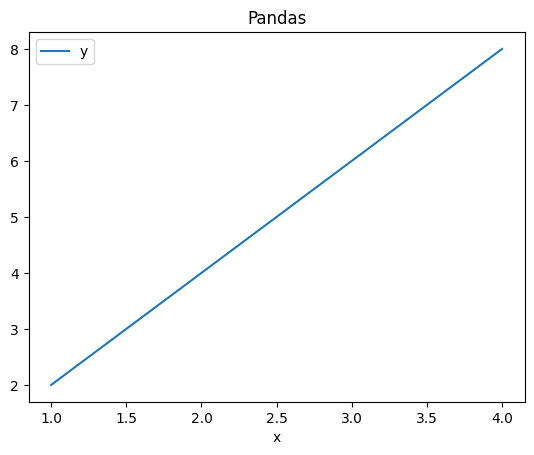

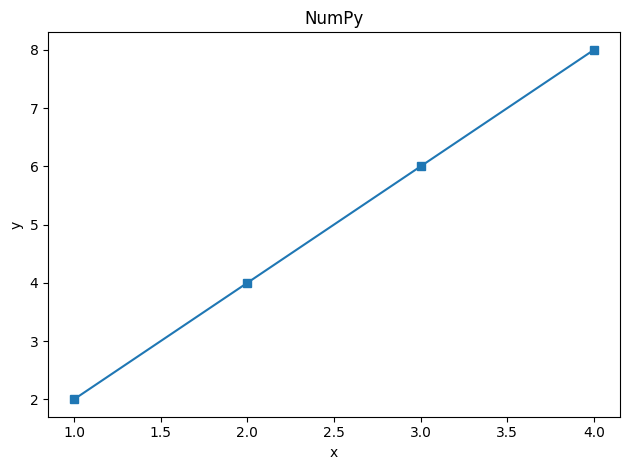

In [18]:
import matplotlib.pyplot as plt

# Create sample data
df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [2, 4, 6, 8]})

# Pandas plotting (columns auto-labeled)
df.plot(x='x', y='y', title="Pandas")

# NumPy plotting (explicit labels needed)
plt.figure()
x = df['x'].to_numpy()
y = df['y'].to_numpy()
plt.plot(x, y, 's-')
plt.title('NumPy'); plt.xlabel('x');plt.ylabel('y');plt.tight_layout();plt.show()

# Choosing the Right Tool for the Job

Use NumPy for efficient numerical computations on homogeneous arrays, while Pandas excels at data cleaning, exploratory analysis, and working with heterogeneous tabular data. Understanding when to use each library—or both together—is key to efficient data analysis.

In [19]:
# Example: When to use each library

# NumPy: Fast numerical computation
large_array = np.random.rand(1000000)
result = np.sum(large_array ** 2)  # Efficient vectorized operation
print(f"NumPy - Sum of squares: {result:.2f}")

# Pandas: Data manipulation and exploration
data = {'product': ['A', 'B', 'C'], 'sales': [100, 150, 200], 'profit': [20, 35, 50]}
df = pd.DataFrame(data)
df['profit_margin'] = df['profit'] / df['sales']
print(f"\nPandas - Profit margins:")
print(df[['product', 'profit_margin']])

NumPy - Sum of squares: 333242.80

Pandas - Profit margins:
  product  profit_margin
0       A       0.200000
1       B       0.233333
2       C       0.250000
